In [1]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get("http://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

In [2]:
#Check Python Version
import sys
assert(sys.version_info.major==3), print(sys.version)

# Data and Stats packages
import numpy as np
import pandas as pd
from sklearn import metrics, datasets
from sklearn.model_selection import train_test_split
import statsmodels.api as sm # RUNNING FOR ME (MSR)

# Visualization packages
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
matplotlib.rcParams['figure.figsize'] = (13.0, 6.0)

# Other Helpful fucntions
import itertools
import warnings
warnings.filterwarnings("ignore")

#Aesthetic settings
from IPython.display import display
pd.set_option('display.max_rows', 999)
pd.set_option('display.width', 500)
pd.set_option('display.notebook_repr_html', True)

Load Titanic datasets <br>
Drop null values <br>
Plot the distribution of fares in at least two ways. Hint: sns.distplot, sns.lmplot <br>
Also for ages, sexes <br>
Plot the differences between male and female in each class. Hint: sns.barplot <br>

In [5]:
titanic = sns.load_dataset("titanic")
titanic = titanic[["age", 'sex', 'class', 'embark_town', 'alone', 'fare']]
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   age          714 non-null    float64 
 1   sex          891 non-null    object  
 2   class        891 non-null    category
 3   embark_town  889 non-null    object  
 4   alone        891 non-null    bool    
 5   fare         891 non-null    float64 
dtypes: bool(1), category(1), float64(2), object(2)
memory usage: 29.8+ KB


In [8]:
titanic = titanic.dropna()
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   age          712 non-null    float64 
 1   sex          712 non-null    object  
 2   class        712 non-null    category
 3   embark_town  712 non-null    object  
 4   alone        712 non-null    bool    
 5   fare         712 non-null    float64 
dtypes: bool(1), category(1), float64(2), object(2)
memory usage: 29.3+ KB


<AxesSubplot:xlabel='fare', ylabel='Density'>

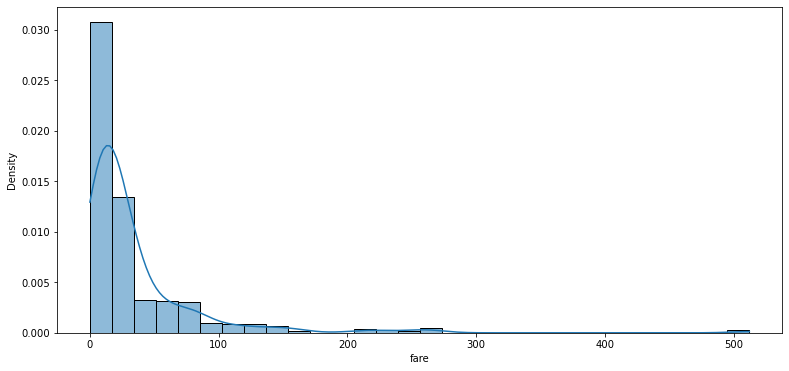

In [10]:
sns.histplot(titanic['fare'], stat='density', bins=30, kde=True)

In [14]:
fare = titanic['fare']

<AxesSubplot:xlabel='$Density$', ylabel='$fare$'>

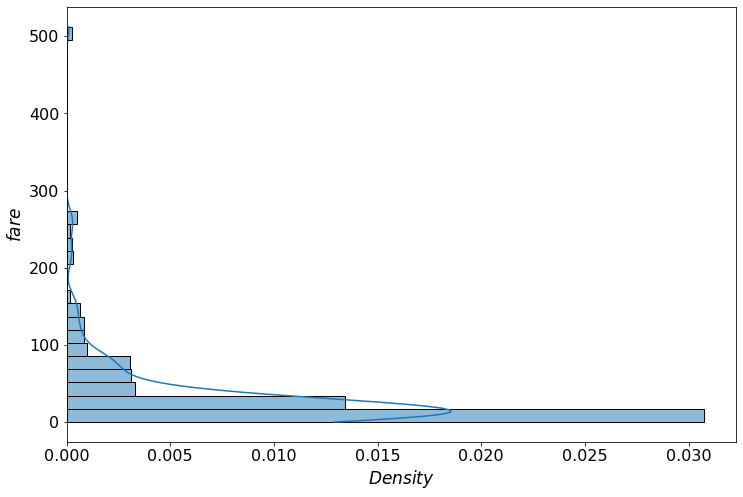

In [26]:
fig, ax = plt.subplots(1,1, figsize=(12,8))
ax.tick_params(labelsize=16)
ax.set_ylabel(r'$fare$',fontsize=17)
ax.set_xlabel(r'$Density$', fontsize=17)
sns.histplot(fare, y=fare,stat='density', bins=30, kde=True)

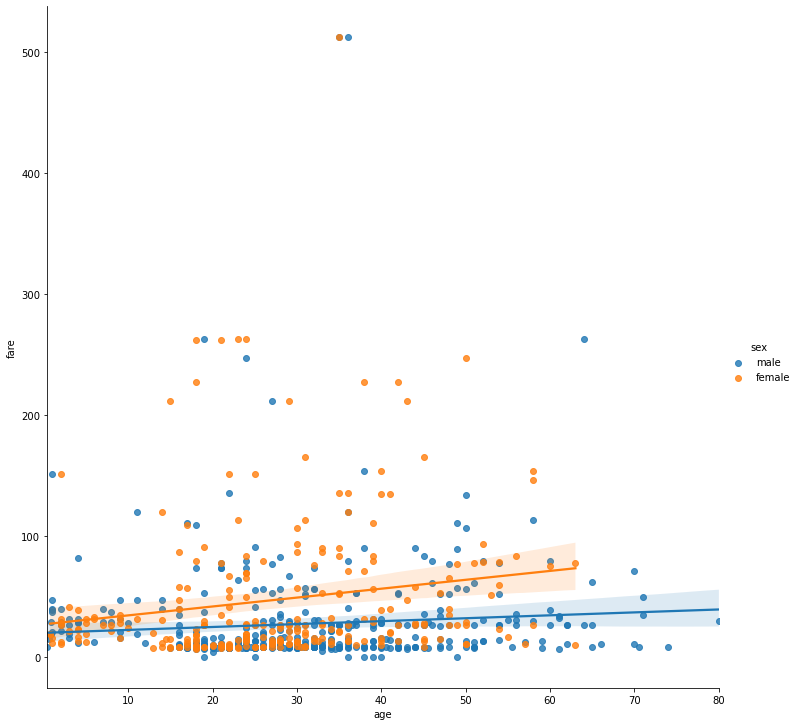

In [56]:
#fig, ax = plt.subplots(1,1, figsize=(12,8))
#ax.tick_params(labelsize=16)
#ax.set_ylabel(r'$fare$',fontsize=17)
#ax.set_xlabel(r'$Density$', fontsize=17)
sns.lmplot(x='age', y='fare', hue='sex', data=titanic, size=10)

<AxesSubplot:xlabel='class', ylabel='fare'>

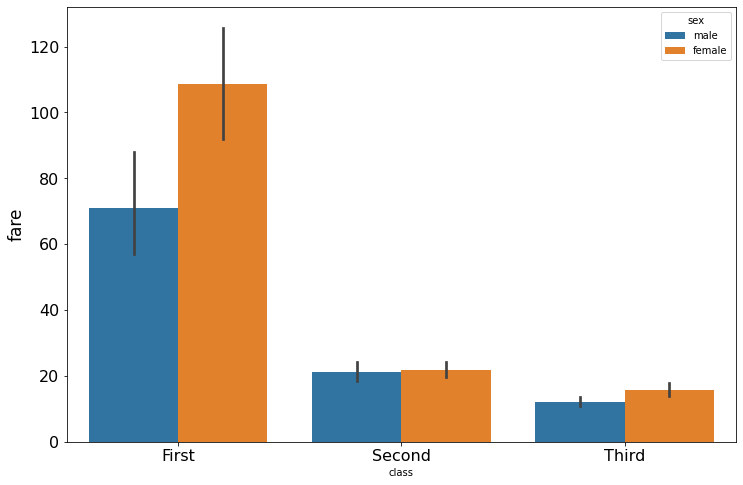

In [52]:
fig, ax = plt.subplots(1,1, figsize=(12,8))
ax.tick_params(labelsize=16)
ax.set_ylabel(r'$fare$',fontsize=17)
#ax.set_xlabel(r'$Density$', fontsize=17)
sns.barplot(x='class', y='fare', hue='sex', data=titanic)

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
ls = LinearRegression()

Model1: Simple regression on age >> fare <br>
Encode sex_male, class_. Hint: (titanic.sex == 'male').astype(int), get_dummies <br>
Model2: Model1 + sex, class variables <br>
Model3: Model2 + age*sex <br>
Model4: Model3 + age*2ndclass + age*3rdclass <br>
Plot r2 of every model <br>

Load datset3.txt <br>
Func: Find best subset of size K, score based on r2. Hint: user itertools.combinations to create subset. <br>
Func: find best models of each subset size k. <br>


In [63]:
age = np.array(titanic['age']).reshape(-1,1)

In [102]:
model1 =LinearRegression().fit(age, titanic['fare'])

In [66]:
titanic['sex_male'] = (titanic.sex=='male').astype(int)

In [74]:
titanic['Second_Class'] = (titanic['class']=='Second').astype(int)
titanic['Third_Class'] = (titanic['class']=='Third').astype(int)
#titanic['Third_Class'] == 1*(titanic['class']=='Third')

In [103]:
x2 = np.column_stack((age, titanic[['sex_male', 'Second_Class', 'Third_Class']]))
x2.shape
model2 = LinearRegression().fit(x2, titanic['fare'])

In [104]:
x3 = np.column_stack((x2, titanic['age']*titanic['sex_male']))
x3.shape
model3 = LinearRegression().fit(x3, titanic['fare'])

In [105]:
x4 = np.column_stack((x3, titanic['age']*titanic['Second_Class'], titanic['age']*titanic['Third_Class']))
x4.shape
model4 = LinearRegression().fit(x4, titanic['fare'])

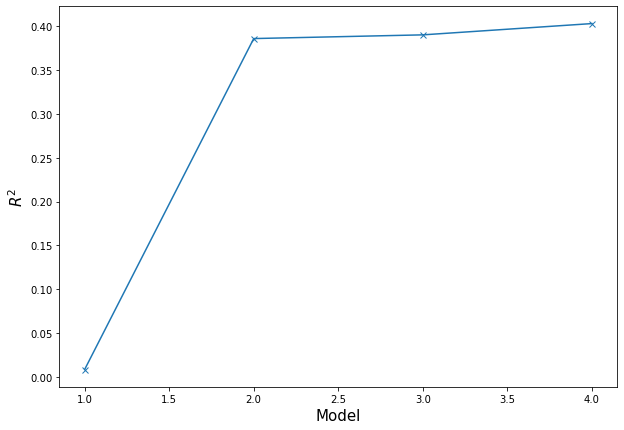

In [113]:
fig, ax = plt.subplots(1,1, figsize=(10,7))
ax.set_ylabel(r'$R^2$', fontsize=15)
ax.set_xlabel('Model', fontsize=15)
r2 = [model1.score(age, titanic['fare']), model2.score(x2, titanic['fare']),
      model3.score(x3, titanic['fare']), model4.score(x4, titanic['fare'])]
ax.plot(np.arange(1,5), r2, 'x-')

Load datset3.txt <br>
Func: Find best subset of size K, score based on r2. Hint: use itertools.combinations to create subset. <br>
Func: find best models of each subset size k. <br>

In [115]:
ds3 = pd.read_csv('data/dataset3.txt')
ds3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      100 non-null    float64
 1   x2      100 non-null    float64
 2   x3      100 non-null    float64
 3   x4      100 non-null    float64
 4   x5      100 non-null    float64
 5   x6      100 non-null    float64
 6   x7      100 non-null    float64
 7   x8      100 non-null    float64
 8   x9      100 non-null    float64
 9   x10     100 non-null    float64
 10  y       100 non-null    float64
dtypes: float64(11)
memory usage: 8.7 KB


In [117]:
ds3.corr()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
x1,1.000000,1.000000,1.000000,-0.189945,-0.232439,-0.215623,-0.228322,-0.047643,-0.061022,0.050977,0.195962
x2,1.000000,1.000000,1.000000,-0.189945,-0.232439,-0.215623,-0.228322,-0.047643,-0.061022,0.050977,0.195962
x3,1.000000,1.000000,1.000000,-0.189945,-0.232439,-0.215623,-0.228322,-0.047643,-0.061022,0.050977,0.195962
x4,-0.189945,-0.189945,-0.189945,1.000000,0.974279,0.964344,0.969540,0.058516,0.108294,-0.010416,-0.225856
x5,-0.232439,-0.232439,-0.232439,0.974279,1.000000,0.982785,0.982227,0.080342,0.126004,-0.012399,-0.257433
x6,-0.215623,-0.215623,-0.215623,0.964344,0.982785,1.000000,0.976308,0.079547,0.123368,-0.021029,-0.261228
x7,-0.228322,-0.228322,-0.228322,0.969540,0.982227,0.976308,1.000000,0.074004,0.112241,-0.022023,-0.235921
x8,-0.047643,-0.047643,-0.047643,0.058516,0.080342,0.079547,0.074004,1.000000,-0.133182,0.052151,0.238538
x9,-0.061022,-0.061022,-0.061022,0.108294,0.126004,0.123368,0.112241,-0.133182,1.000000,0.006923,-0.607845
x10,0.050977,0.050977,0.050977,-0.010416,-0.012399,-0.021029,-0.022023,0.052151,0.006923,1.000000,-0.406231


array([[<AxesSubplot:xlabel='x1', ylabel='x1'>,
        <AxesSubplot:xlabel='x2', ylabel='x1'>,
        <AxesSubplot:xlabel='x3', ylabel='x1'>,
        <AxesSubplot:xlabel='x4', ylabel='x1'>,
        <AxesSubplot:xlabel='x5', ylabel='x1'>,
        <AxesSubplot:xlabel='x6', ylabel='x1'>,
        <AxesSubplot:xlabel='x7', ylabel='x1'>,
        <AxesSubplot:xlabel='x8', ylabel='x1'>,
        <AxesSubplot:xlabel='x9', ylabel='x1'>,
        <AxesSubplot:xlabel='x10', ylabel='x1'>,
        <AxesSubplot:xlabel='y', ylabel='x1'>],
       [<AxesSubplot:xlabel='x1', ylabel='x2'>,
        <AxesSubplot:xlabel='x2', ylabel='x2'>,
        <AxesSubplot:xlabel='x3', ylabel='x2'>,
        <AxesSubplot:xlabel='x4', ylabel='x2'>,
        <AxesSubplot:xlabel='x5', ylabel='x2'>,
        <AxesSubplot:xlabel='x6', ylabel='x2'>,
        <AxesSubplot:xlabel='x7', ylabel='x2'>,
        <AxesSubplot:xlabel='x8', ylabel='x2'>,
        <AxesSubplot:xlabel='x9', ylabel='x2'>,
        <AxesSubplot:xlabel='x10', ylab

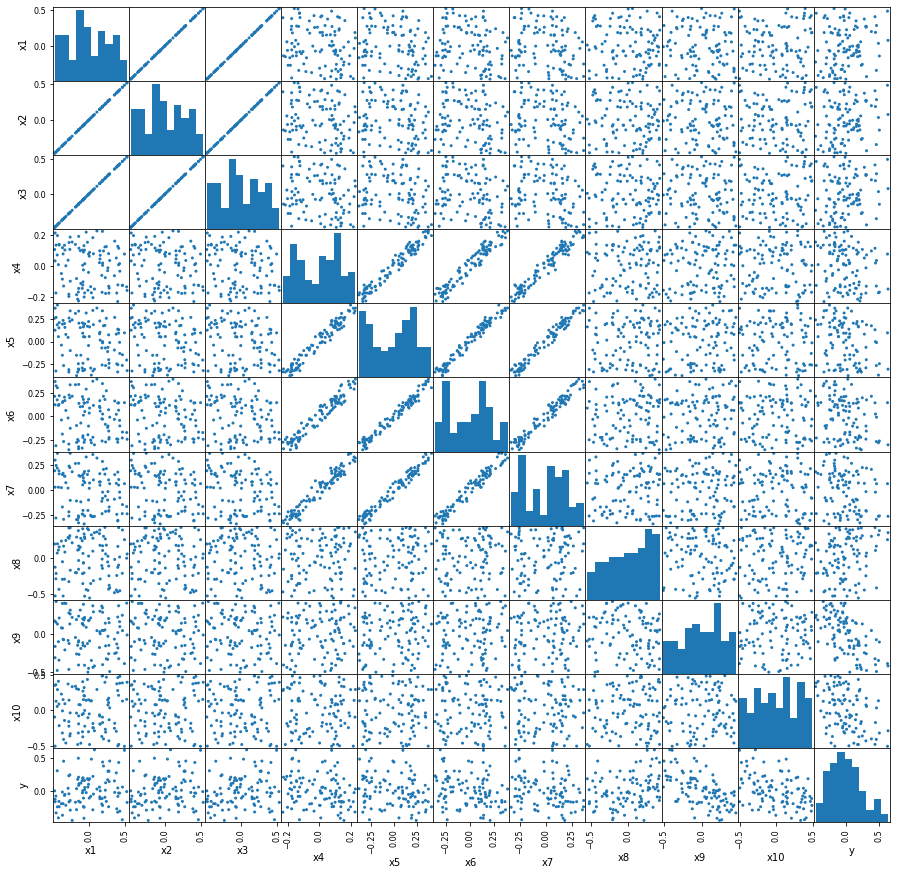

In [119]:
pd.plotting.scatter_matrix(ds3, alpha=1, figsize=(15, 15))

In [132]:
def find_best_subset_sizeK(x, y, k):
    from sklearn.linear_model import LinearRegression
    best_model = False
    R2 = None
    
    for i in itertools.combinations(x.columns, k):
        model = LinearRegression().fit(x[[j for j in i]], y)
        r2 = model.score(x[[j for j in i]], y)
        if not best_model or r2 > R2:
            best_model = model
            R2 = r2
    return best_model, R2
    

In [135]:
len(x.columns)

10

In [139]:
def exhaustive_search_selection(x,y):
    K = len(x.columns)
    best_models = {}
    for k in range(1, K+1):
        best_models[k] = {'best_model' : False,
                           'R2': None}
    for k in range(1,K+1):
        best_models[k]['best_model'], best_models[k]['R2'] = find_best_subset_sizeK(x,y,k)
    return best_models
    

In [142]:
best_models = exhaustive_search_selection(x,y)

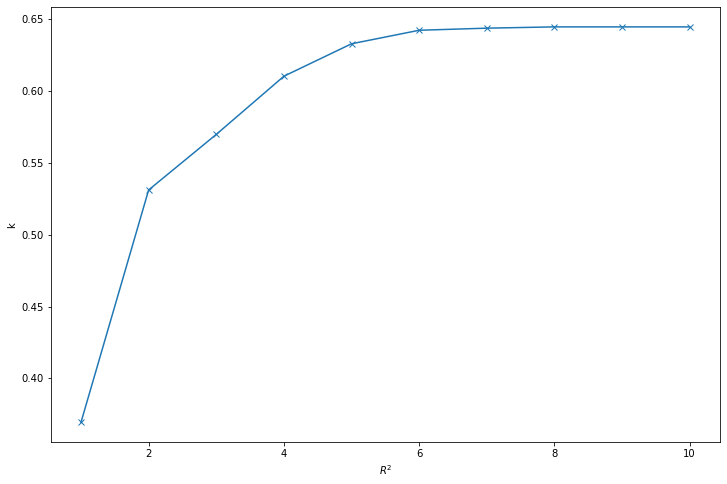

In [143]:
fig, ax = plt.subplots(1,1, figsize=(12,8))
ax.set_ylabel('k')
ax.set_xlabel(r'$R^2$')
ax.plot(np.arange(1,11), [best_models[k]['R2'] for k in range(1,11)], 'x-')